In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# DATA COLLECTION

In [4]:
data=pd.read_csv('yelp.csv')
df=data.copy()

In [5]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


#   DATA PREPROCESSING

In [6]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ksvim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

text cleaning

In [8]:
def clean_text(text):
    #removing html tags 
    text=re.sub(r'<.*?>', '', text)
    #removing special characters
    text=re.sub(r'[^a-zA-Z\s]', '', text)
    #lowercase conversion
    text=text.lower()
    #tokenization
    text=text.split()
    #removing stopwords
    text=[word for word in text if word not in stopwords] 
    #joining the tokens
    text=' '.join(text)
    return text

In [9]:
#apply the function to clean the text in reviews
df['cleaned_text']=df['text'].apply(clean_text)

In [10]:
df['cleaned_text'].head()

0    wife took birthday breakfast excellent weather...
1    idea people give bad reviews place goes show p...
2    love gyro plate rice good also dig candy selec...
3    rosie dakota love chaparral dog park convenien...
4    general manager scott petello good egg go deta...
Name: cleaned_text, dtype: object

In [11]:
df

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,cleaned_text
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,wife took birthday breakfast excellent weather...
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,idea people give bad reviews place goes show p...
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,love gyro plate rice good also dig candy selec...
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,rosie dakota love chaparral dog park convenien...
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,general manager scott petello good egg go deta...
...,...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0,first visithad lunch today used groupon ordere...
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\r\n\r...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0,called house deliciousness could go item item ...
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0,recently visited olive ivy business last week ...
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0,nephew moved scottsdale recently bunch friends...


In [12]:
#Handling Missing values
m_values=df.isnull().sum()
m_values

business_id     0
date            0
review_id       0
stars           0
text            0
type            0
user_id         0
cool            0
useful          0
funny           0
cleaned_text    0
dtype: int64

In [13]:
df.shape

(10000, 11)

##  EDA

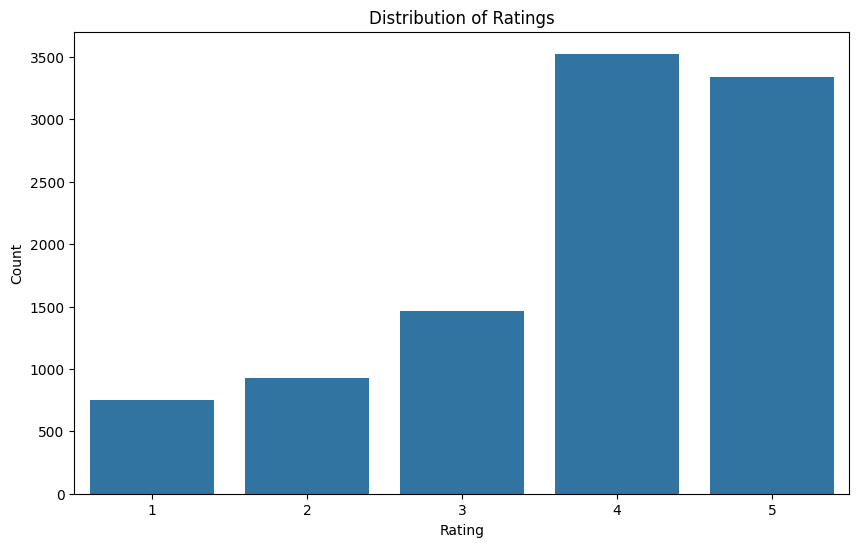

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x='stars', data=df)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

#overview:
-   imbalanced data 
-   positive reviews ~ 7000 and negative reviews ~ 3000

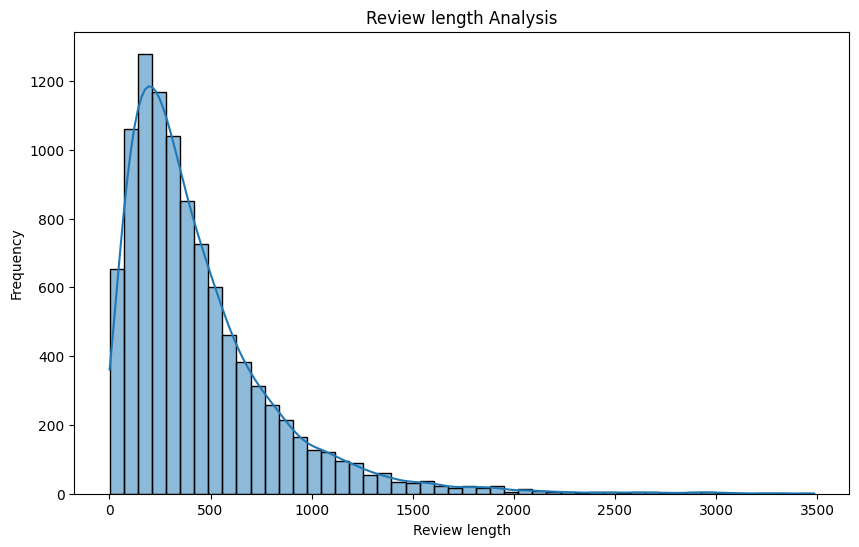

In [15]:
df['review_length'] = df['cleaned_text'].apply(len)

plt.figure(figsize=(10,6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Review length Analysis")
plt.xlabel("Review length")
plt.ylabel("Frequency")
plt.show()

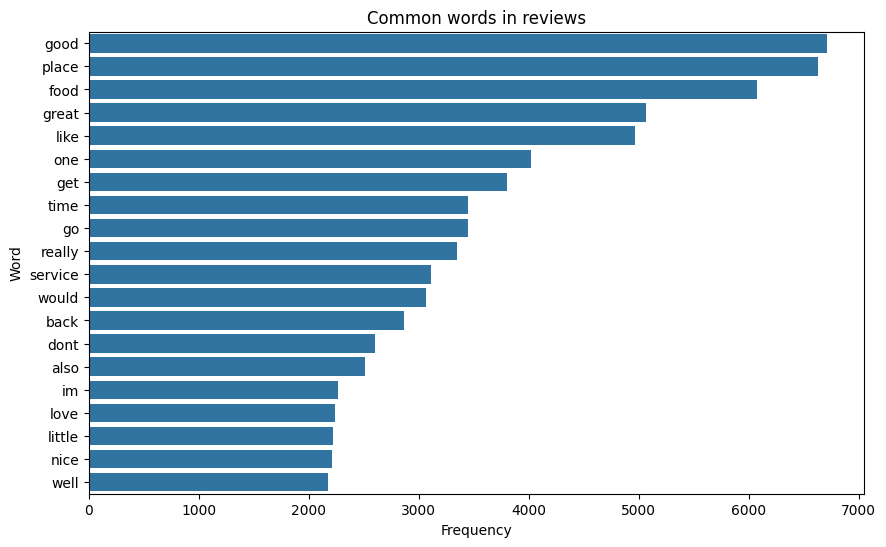

In [16]:
#common phrase and common words
from collections import Counter

all_words= ' '.join(df['cleaned_text']).split()
word_counts= Counter(all_words)
common_words=word_counts.most_common(20)

common_words_df=pd.DataFrame(common_words, columns=['Word','Frequency'])

plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Word', data=common_words_df)
plt.title("Common words in reviews")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

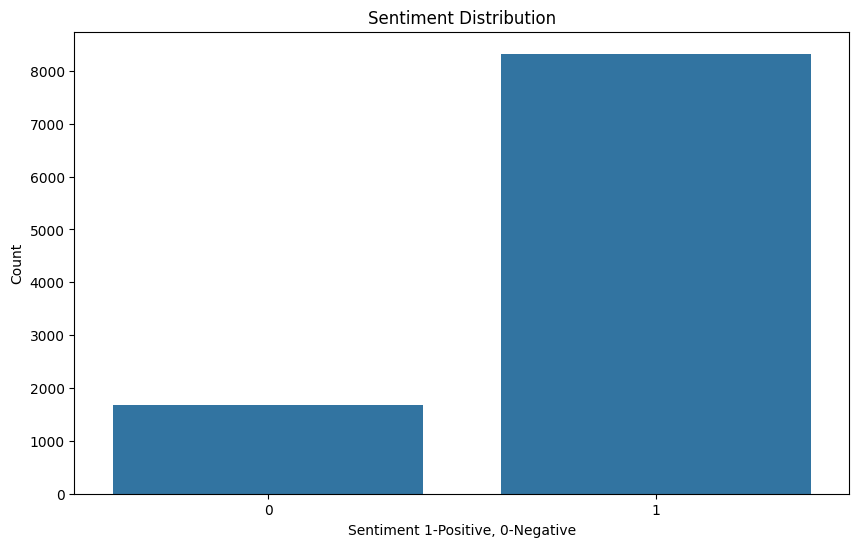

In [17]:
#sentiment distribution
#positive(rating>=3) || negative(rating<3)
df['sentiment']=df['stars'].apply(lambda x:1 if x>=3 else 0)

plt.figure(figsize=(10,6))
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment 1-Positive, 0-Negative")
plt.ylabel("Count")
plt.show()

In [18]:
#data splitting
df['stars']=df['stars'].apply(lambda x:0 if x <=3 else 1)
group_0=df[df['stars']==0].sample(3000, random_state=42)
group_1=df[df['stars']==1].sample(3000, random_state=42)
balanced_df=pd.concat([group_0,group_1]).reset_index(drop=True)

In [19]:
balanced_df

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,cleaned_text,review_length,sentiment
0,UETunq2HsmwW9pbsSGWZ6g,2012-09-03,wkGiNk7n8fvdvWY0wSdDtw,0,Went to Deer Garden Signature last night with ...,review,7knTjXA1lNJw7AMIIJi4YQ,0,1,1,went deer garden signature last night wife din...,509,1
1,tHP-YGYtc5-t3MofXFgk2A,2011-01-14,11dydAJbZItvNFkhIzzAGg,0,If I'm rating strictly on getting what I wante...,review,SIG_tdhVIapMsHzYjIFyAg,0,0,1,im rating strictly getting wanted visit doctor...,1129,0
2,41j3GB7M-Lwq284Pfb9zgw,2012-09-10,EqwQIojP46MwQVAwHpUrNg,0,I was not a particular fan of this place. Went...,review,ZUx-B52hGRhmeUDVukmjrg,1,6,3,particular fan place went friday evening work ...,565,0
3,ntN85eu27C04nwyPa8IHtw,2009-08-02,kxqQPk-bX8KWne5I9lKJ8A,0,I was disappointed too. I waited an hour and ...,review,lEqTAm47rLt_6EI9Ey8kSw,1,2,2,disappointed waited hour took seat counter ok ...,511,1
4,sHtnIhtnjB1uWMrZsM_Lsw,2011-08-31,MO27co7Z0p2hDI_-zS_OVQ,0,I'm from Philly and had to stop in when I foun...,review,ZTF84I4I5x4TBpdoWwLEmg,0,1,0,im philly stop found ritas open wasnt exactly ...,272,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,IceZ4BtTz76eppjNWm-c6A,2009-03-22,zyBsC19FOPWQ8M_RpT-KKw,1,"Yummy, creative sandwiches! Good prices. Hig...",review,d2RAl63RTdfZF7kcuKcj-g,0,1,2,yummy creative sandwiches good prices highly r...,165,1
5996,3l72FflaaeI0tWEAWN3-gQ,2010-05-30,0ivc3MeeKsHP6QLsPxqa2Q,1,I stopped by here last night after the Suns ga...,review,OhZEYs9jzyiTaSu_CfeVUA,0,0,0,stopped last night suns game cheap fast also f...,363,1
5997,IYYaa562PybzXf8tQnT17w,2009-03-02,E7Zuy5x72Dwpnd_ariNfTA,1,I have been to every ballpark in the Cactus Le...,review,fev0iI-XDrteD4SYRKjiUw,3,4,2,every ballpark cactus league know way around f...,1170,1
5998,QnAzW6KMSciUcuJ20oI3Bw,2010-05-06,liVW_Bg-7v0vp6j3B1JxCw,1,Take the whole family and get a nice table out...,review,Pwil2kkb1mNO6jVsAI84wA,0,0,0,take whole family get nice table outside burge...,100,1


In [20]:
bdf=balanced_df.copy()

In [21]:
from sklearn.model_selection import train_test_split
X=bdf['cleaned_text']
y=bdf['stars']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
bdf.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,cleaned_text,review_length,sentiment
0,UETunq2HsmwW9pbsSGWZ6g,2012-09-03,wkGiNk7n8fvdvWY0wSdDtw,0,Went to Deer Garden Signature last night with ...,review,7knTjXA1lNJw7AMIIJi4YQ,0,1,1,went deer garden signature last night wife din...,509,1
1,tHP-YGYtc5-t3MofXFgk2A,2011-01-14,11dydAJbZItvNFkhIzzAGg,0,If I'm rating strictly on getting what I wante...,review,SIG_tdhVIapMsHzYjIFyAg,0,0,1,im rating strictly getting wanted visit doctor...,1129,0
2,41j3GB7M-Lwq284Pfb9zgw,2012-09-10,EqwQIojP46MwQVAwHpUrNg,0,I was not a particular fan of this place. Went...,review,ZUx-B52hGRhmeUDVukmjrg,1,6,3,particular fan place went friday evening work ...,565,0
3,ntN85eu27C04nwyPa8IHtw,2009-08-02,kxqQPk-bX8KWne5I9lKJ8A,0,I was disappointed too. I waited an hour and ...,review,lEqTAm47rLt_6EI9Ey8kSw,1,2,2,disappointed waited hour took seat counter ok ...,511,1
4,sHtnIhtnjB1uWMrZsM_Lsw,2011-08-31,MO27co7Z0p2hDI_-zS_OVQ,0,I'm from Philly and had to stop in when I foun...,review,ZTF84I4I5x4TBpdoWwLEmg,0,1,0,im philly stop found ritas open wasnt exactly ...,272,0


In [23]:
X.shape, X_train.shape, X_test.shape

((6000,), (4800,), (1200,))

# RNN model

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam

# Text Tokenizing
tokenizer=Tokenizer(num_words=5000, lower=True, oov_token='<00V>')
tokenizer.fit_on_texts(X_train)
word_index=tokenizer.word_index

#text to sequence conversion
X_train_seq= tokenizer.texts_to_sequences(X_train)
X_test_seq= tokenizer.texts_to_sequences(X_test)

#padding sequences
max_length = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)


In [25]:
# RNN Model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))  # Define input_length
rnn_model.add(SpatialDropout1D(0.2))

rnn_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
rnn_model.add(BatchNormalization())

rnn_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dropout(0.2))

rnn_model.add(Dense(2, activation='softmax'))

# Compile model
optimizer = Adam(learning_rate=1e-4)
rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Build the model by passing an example input
rnn_model.build(input_shape=(None, 200))

# Model summary
rnn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 200, 128)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 200, 100)       │        91,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 200, 100)       │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 818,994 (3.12 MB)

 Trainable params: 818,794 (3.12 MB)

 Non-trainable params: 200 (800.00 B)

In [26]:
#train the rnn model
history_rnn = rnn_model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 43s 493ms/step - accuracy: 0.4968 - loss: 0.7049 - val_accuracy: 0.4892 - val_loss: 0.6928
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 492ms/step - accuracy: 0.5440 - loss: 0.6879 - val_accuracy: 0.5175 - val_loss: 0.6905
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 36s 479ms/step - accuracy: 0.6120 - loss: 0.6539 - val_accuracy: 0.6958 - val_loss: 0.6747
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 36s 478ms/step - accuracy: 0.7084 - loss: 0.5688 - val_accuracy: 0.7350 - val_loss: 0.6410
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 36s 478ms/step - accuracy: 0.7562 - loss: 0.5040 - val_accuracy: 0.7383 - val_loss: 0.5984
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 36s 480ms/step - accuracy: 0.8014 - loss: 0.4437 - val_accuracy: 0.7517 - val_loss: 0.5419
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 35s 470ms/step - accuracy: 0.8111 - loss: 0.4259 - val_accuracy: 0.7617 - val_loss: 0.5071
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 495ms/step - accuracy: 0.8374 - loss: 0.3768 - val_accu

# Evaluation Metrics

In [27]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step
RNN Model Evaluation
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       613
           1       0.76      0.72      0.74       587

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200



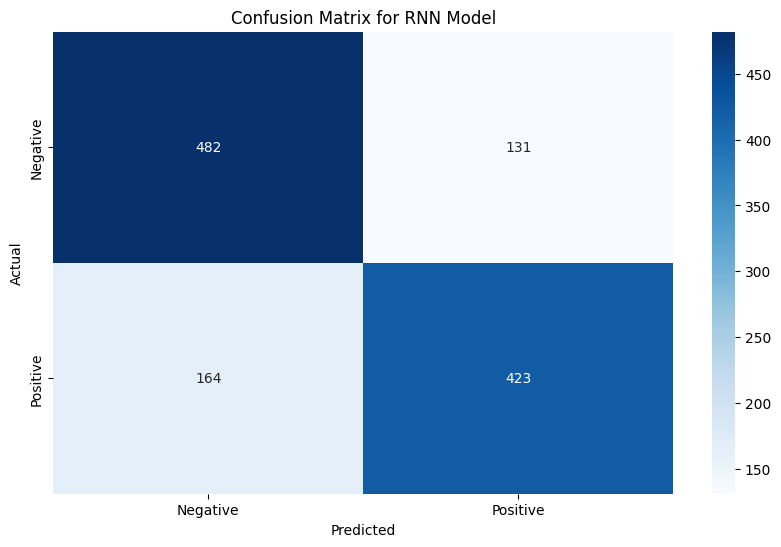

In [28]:
#Precision, Recall, F1 Score, Confusion matrix analysis
from sklearn.metrics import classification_report, confusion_matrix

#predicting using Rnn model
rnn_predictions = rnn_model.predict(X_test_pad)
rnn_predictions = rnn_predictions.argmax(axis=1)

#evaluation for rnn model
print("RNN Model Evaluation")
print(classification_report(y_test, rnn_predictions))
plot_confusion_matrix(y_test, rnn_predictions, 'Confusion Matrix for RNN Model')

In [29]:
def predict_sentiment_rnn(review):
    cleaned_review = clean_text(review)
    sequence = tokenizer.texts_to_sequences([cleaned_review])
    padded_sequence = pad_sequences(sequence, maxlen=max_length)
    prediction= rnn_model.predict(padded_sequence)
    index = prediction.argmax(axis=1)[0]
    sentiment = "Positive" if index > 0 else "Negative"
    print("Score:",max(prediction[0]))
    return sentiment

#test the real-time functions
test_review = "The food was amazing and the service was excellent"
print("RNN model prediction", predict_sentiment_rnn(test_review))

test_review="worst experience i had, food was awful"
print("RNN model prediction", predict_sentiment_rnn(test_review))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Score: 0.77817255
RNN model prediction Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Score: 0.67723536
RNN model prediction Negative


In [30]:

df = pd.read_csv('yelp.csv')
print(df.head())

for i in range(5): 
    review = df['text'][i]
    print(f"Review: {review}")
    print(f"Prediction: {predict_sentiment_rnn(review)}")
    print('-' * 60)


              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiobPvh6cDC8JQg     0    